In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import wordcloud as wc

C:\Users\dillc\AppData\Local\Temp\ipykernel_28420\1447637324.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Question: How do people conceptualize the Truth of their perceptions?
## Hypothesis 1: Each individual's (mine and other humans') reality is True
## Hypothesis 2: Reality is True, and each individual has more or less representative sampling of reality
## Hypothesis 3: My Reality is True, but I can't be sure that everyone else's is.

In [3]:
bs = pd.read_csv(os.getcwd()+"\\beliefs_survey.csv")
print(bs.columns)
#bs = bs.transpose()#.head()

hyp_colums = [np.nan, np.nan, 1, 2, 2, 1, 2, 2, 3, 2, 2, 1, np.nan, np.nan, np.nan, np.nan, np.nan]
q_label = ['subID', 'time', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o']
cols_dict = {col:(hyp_colums[i], q_label[i]) for i, col in enumerate(bs.columns)}

melted = pd.melt(bs, id_vars='subject', value_vars=[c for c in bs.columns])#.to_csv(os.getcwd()+'\\test.csv')
#melted.head()
print(cols_dict.keys())

hyp_label = [cols_dict[k][0] for k in melted['variable']]
question_label = [cols_dict[k][1] for k in melted['variable']]
melted['hypothesis'] = hyp_label
melted['questions_label'] = question_label

melted = melted.sort_values(['subject','questions_label'])
melted.head()

Index(['subject', 'Timestamp',
       'To what extent do you agree with the statement: "Differences in opinion or perspective between people reflect a variety of different realities, all of which are true realities."',
       'To what extent do you agree: "My knowledge about the world is not the same as my beliefs about the world."',
       'To what extent do you agree with the statement: "If we had perfect measurements of the world around us, we could in theory know what was true (and therefore know reality)."',
       'To what extent do you agree with the statement: "Empathy for other people's point of view means acknowledging that their point of view is as true as my own."',
       'To what extent do you agree with the statement: "Reality is an objective truth to which I have imperfect access"?',
       'To what extent do you agree with the statement: "Things are True or Not True, and people's perspectives on whether something is True or Not True does not affect how True or Not True

,subject,variable,value,hypothesis,questions_label
24,0,To what extent do you agree with the statement...,10,1.0,a
48,0,"To what extent do you agree: ""My knowledge abo...",5,2.0,b
72,0,To what extent do you agree with the statement...,3,2.0,c
96,0,To what extent do you agree with the statement...,10,1.0,d
120,0,To what extent do you agree with the statement...,3.0,2.0,e


In [13]:
illusionVreality = melted[melted['questions_label']=='k']
resps_list = list(illusionVreality['value'].dropna())
[resps_list[i].split(' ') for i in range(len(resps_list))]

[['I', 'don’t'],
 ['I',
  'trust',
  'my',
  'gut',
  'and',
  'listen',
  'to',
  'the',
  'deeper,',
  'core',
  'part',
  'of',
  'myself',
  'that',
  'seems',
  'certain',
  'about',
  'most',
  'things'],
 ['I', 'don’t', '!', 'Is', 'that', 'even', 'possible?'],
 ['I',
  'view',
  'my',
  'perception',
  'as',
  'a',
  'controlled',
  'hallucination',
  'that',
  'is',
  'constructed',
  '(amazingly)',
  'through',
  'the',
  'interactions',
  'of',
  'my',
  'moment-by-moment',
  'perceptions',
  'of',
  'a',
  'physical',
  'reality',
  'and',
  'ongoing',
  'brain',
  'activity.',
  'It',
  'is',
  'necessarily',
  'imperfect,',
  'but',
  'false',
  'conceptions',
  'of',
  'the',
  'reality',
  'should',
  'be',
  'borne',
  'out',
  'through',
  'humility',
  'and',
  'continual',
  'updating',
  'of',
  'beliefs',
  '(constructed',
  'from',
  'previous',
  'perceptions/brain',
  'states)',
  'with',
  'current',
  'perceptions/brain',
  'states.'],
 ['Trust', 'the', 'exper

<Axes: xlabel='subject', ylabel='value'>

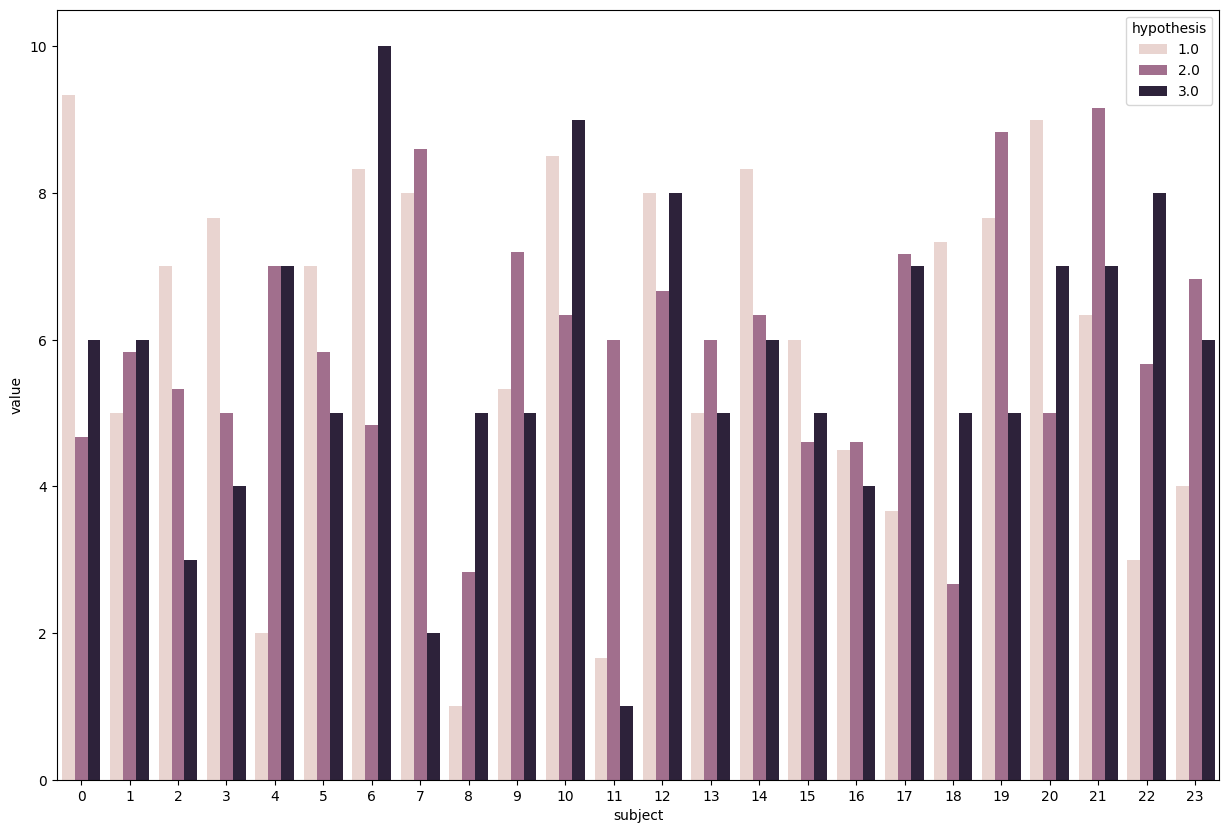

In [4]:
fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(data=melted[np.isfinite(melted['hypothesis'])], x='subject', y='value', hue='hypothesis', errorbar=None, ax=ax)

<Axes: xlabel='hypothesis', ylabel='value'>

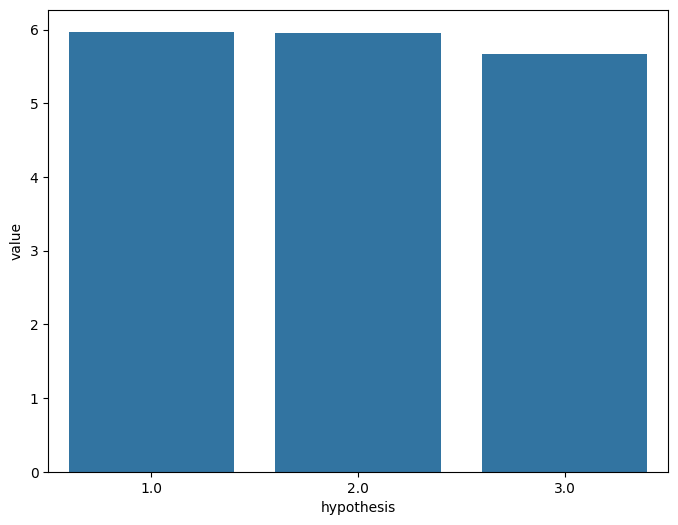

In [5]:
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(data=melted[np.isfinite(melted['hypothesis'])], x='hypothesis', y='value', errorbar=None, ax=ax)

In [ ]:
txt_font = 'Arial'
wc.